<a href="https://colab.research.google.com/github/Rishika332002/Boston-House-Price-Prediction/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading Dataset to the Pandas DataFrame
house_price_df = pd.read_csv('train.csv')

In [ ]:
# Displaying first five rows of the DataFrame
house_price_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


**Observation**:


*   The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).



In [ ]:
# Checking the rows and columns in the DataFrame
house_price_df.shape

(333, 15)

In [ ]:
#check for the null values
house_price_df.isnull().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


**Observation:**

The output shows that all columns in the house_price_df DataFrame have 0 missing values. This means the dataset is complete and doesn't require any handling of missing data before proceeding with analysis or modeling.

In [ ]:
# Printing the target variable
house_price_df.medv

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


In [ ]:
# Checking the info of the data
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


**Observation:**


*   There are a total of 333 non-null observations in each of the columns. This indicates that there are no missing values in the data.
*   There are 15 columns in the dataset and every column is of numeric data type.



In [ ]:
# Statistical measure of the data
house_price_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


**Observation:**

The output of house_price_df.describe() provides summary statistics for each column in the house_price_df DataFrame. This includes:

* count: The number of non-null values in each column.
* mean: The average value of each column.
* std: The standard deviation of each column, measuring the dispersion of values.
* min: The minimum value in each column.
* 25%: The first quartile (25th percentile) of each column.
* 50%: The median (50th percentile) of each column.
* 75%: The third quartile (75th percentile) of each column.
* max: The maximum value in each column.
**bold text**
By analyzing these statistics, we can gain insights into the distribution of data in each column, identify outliers, and assess the overall data quality.

**EDA-> Exploratory Data Analysis**

<Axes: >

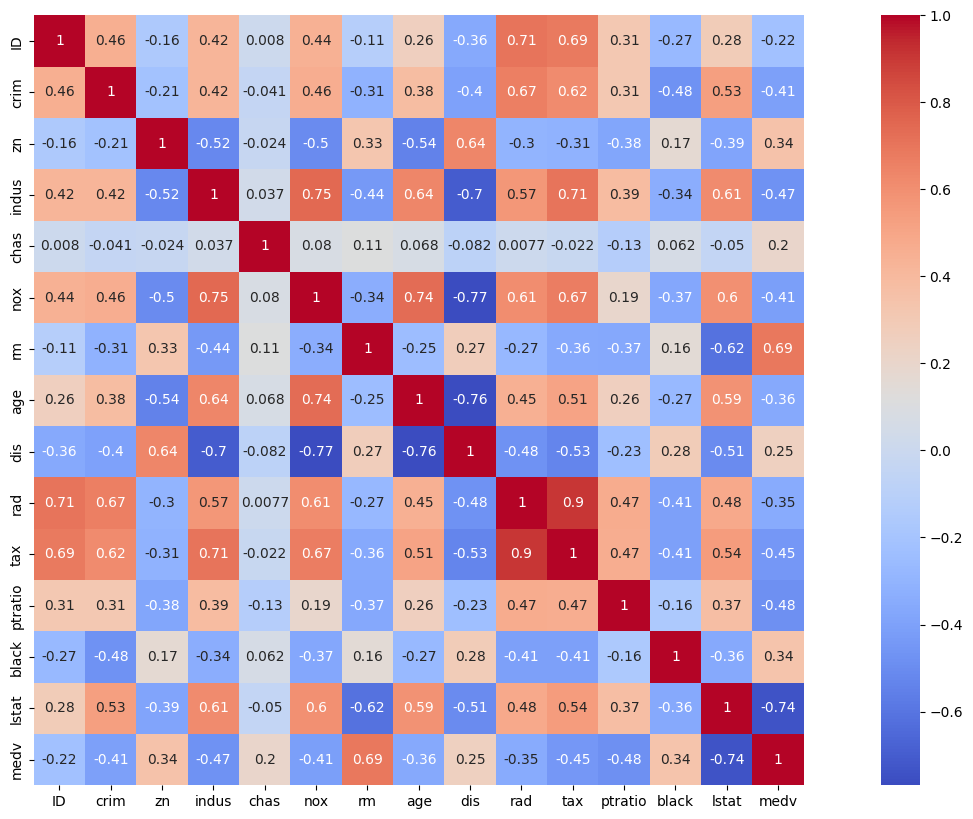

In [ ]:
# Heatmap to understand the correlation
plt.figure(figsize=(20,10))
sns.heatmap(house_price_df.corr(), cbar=True, square=True, annot=True, cmap='coolwarm')

**Observation**:

Calculates the correlation matrix between all numerical columns in the house_price_df DataFrame. A correlation matrix is a table showing the correlation coefficients between pairs of variables.

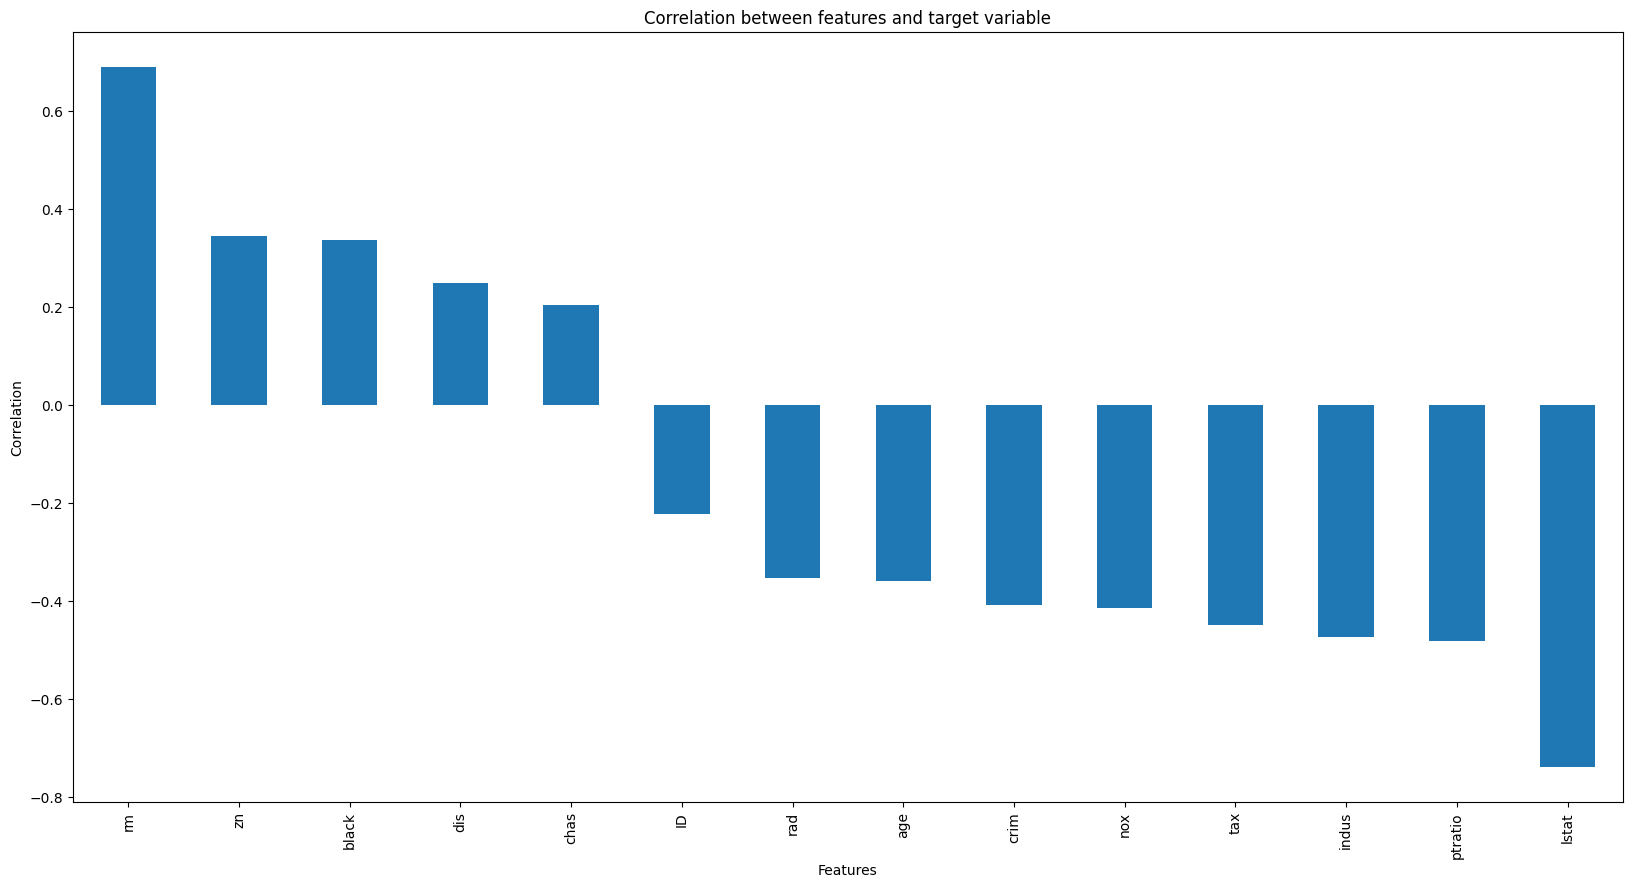

In [82]:
# Create a bar plot to visualize the correlation between all the features and the target variable(medv)
plt.figure(figsize=(20,10))
plt.title('Correlation between features and target variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
house_price_df.corr()['medv'].sort_values(ascending=False).drop(['medv']).plot(kind='bar')
plt.savefig("correlation.jpg")

**Observation**:

This bar plot helps you visualize the strength and direction of the relationship between each feature and the median house price.

* Positive bars: Features with positive correlations (above the x-axis) suggest that as the value of the feature increases, the median house price tends to increase as well.
* Negative bars: Features with negative correlations (below the x-axis) suggest that as the value of the feature increases, the median house price tends to decrease.
* Bar height: The height of the bar indicates the strength of the correlation. A longer bar indicates a stronger correlation (positive or negative).

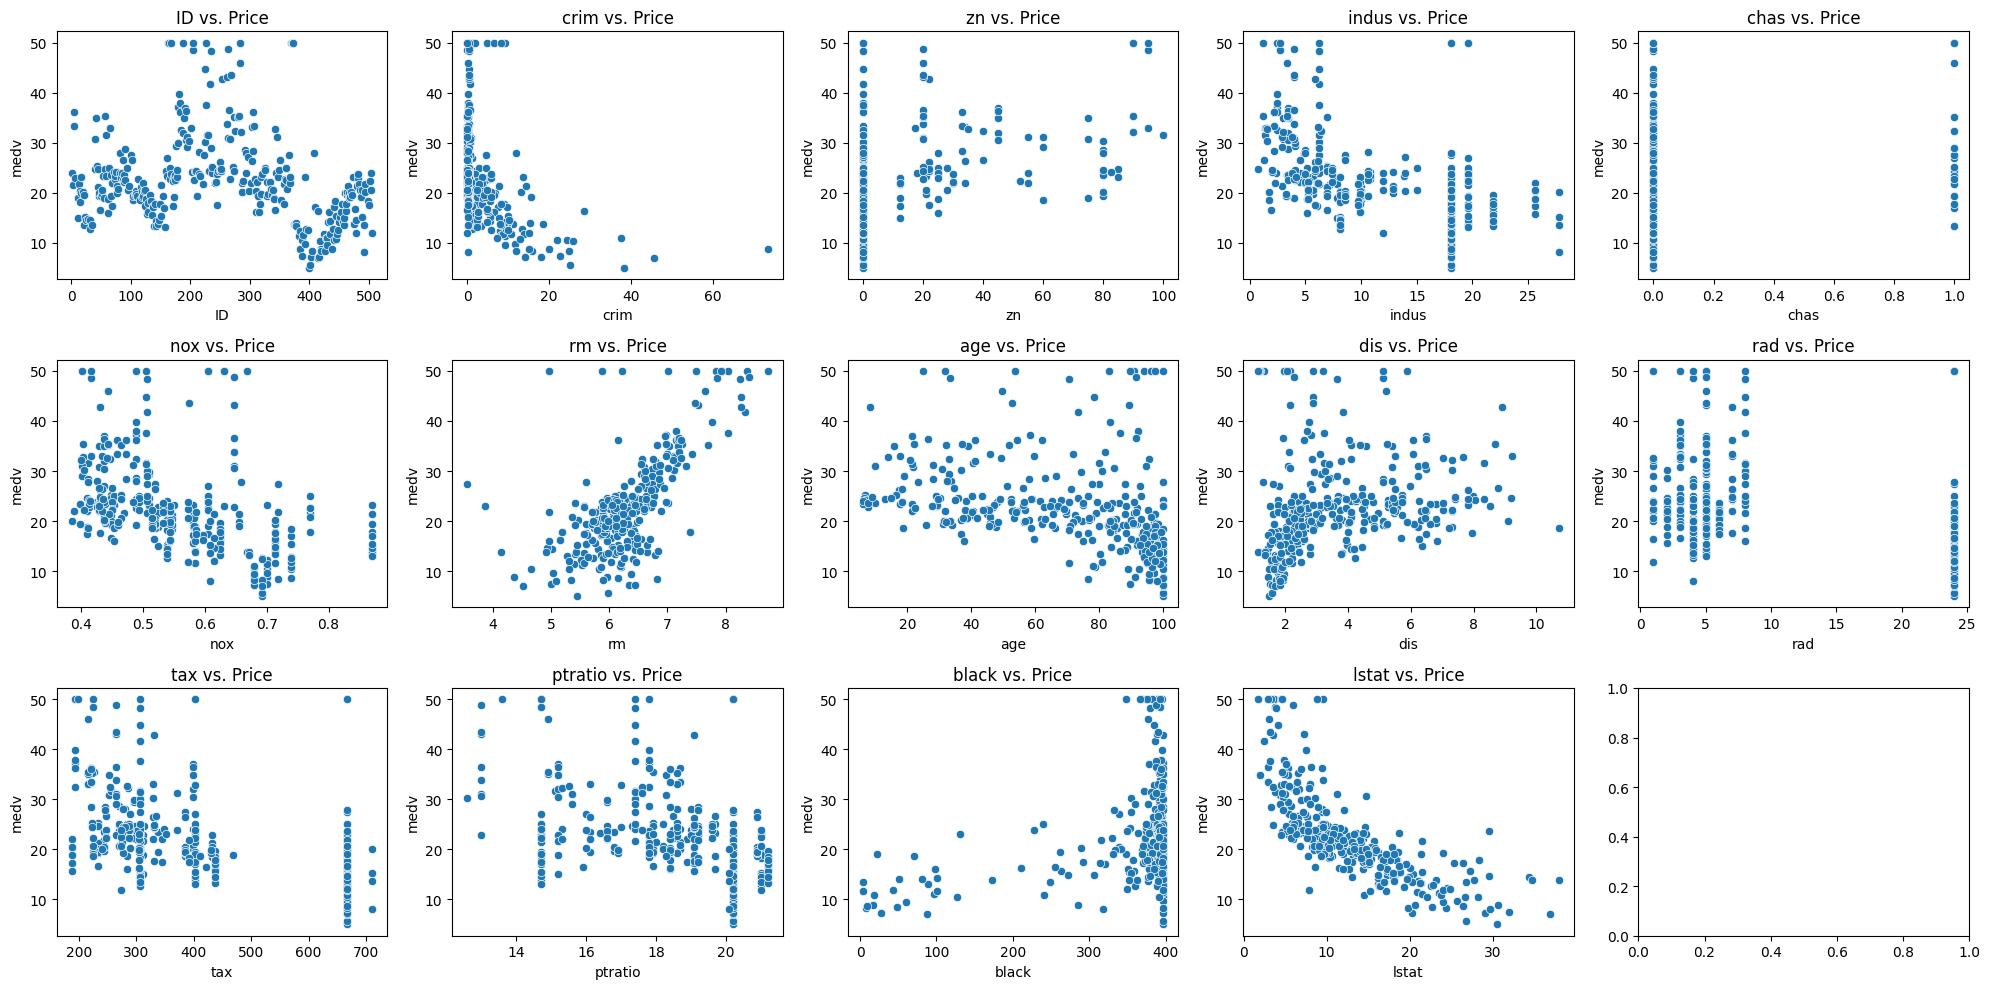

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scatter plot between all the features and target variable(medv)
independent_vars = ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10)) # increased the figure size and changed the arrangement of subplots

axes = axes.flatten() # flatten the axes array for easier indexing

for i, var in enumerate(independent_vars):
    sns.scatterplot(x=var, y='medv', data=house_price_df, ax=axes[i]) # use flattened array for indexing
    axes[i].set_title(f'{var} vs. Price')

plt.tight_layout()
plt.show()
plt.savefig("scatterplot.jpg")

**Observation**:

By plotting scatter plots of each feature against the target variable MEDV, you can gain insights into the relationships between these features and the house prices.

**Boxplot: To detect the outliers in the dataset**

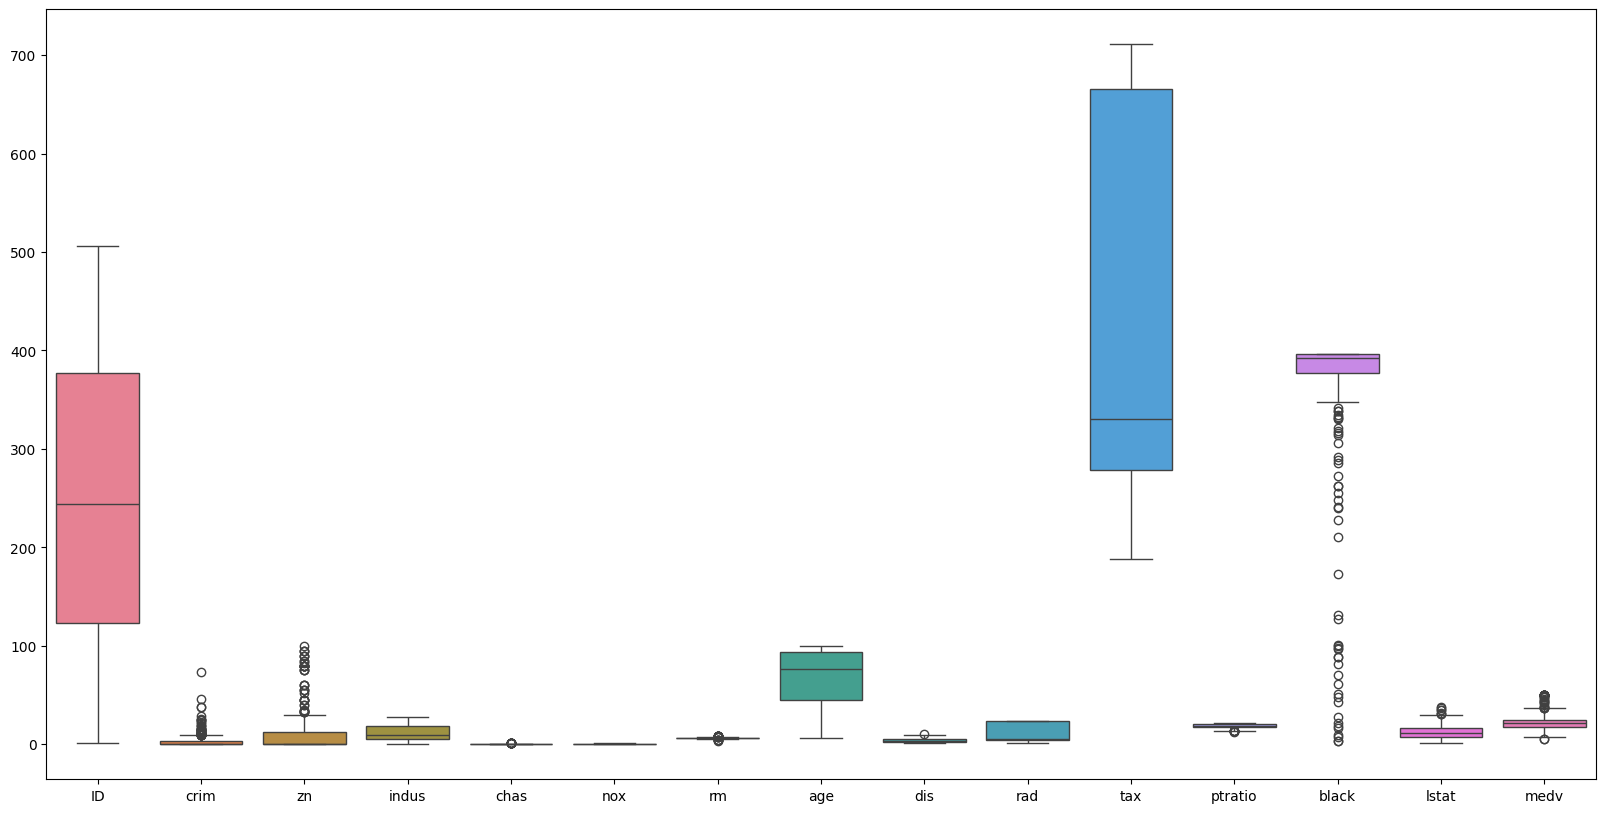

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=house_price_df, ax=ax)
plt.savefig("boxplot.jpg")

**Observation:**


*   In the graph, the dots represent the outliers.
*   The column containing many outliers does not follow the normal distribution.
*   We can minimalize the outliers by normalization.



In [ ]:
# Split the data into independent and dependent features
x = house_price_df.iloc[:,:-1]
y = house_price_df.iloc[:,-1]

In [ ]:
x

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [ ]:
y

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


In [ ]:
print(house_price_df.std())

ID         147.859438
crim         7.352272
zn          22.674762
indus        6.998123
chas         0.237956
nox          0.114955
rm           0.703952
age         28.133344
dis          1.981123
rad          8.742174
tax        170.841988
ptratio      2.151821
black       86.584567
lstat        7.067781
medv         9.173468
dtype: float64


**Observation**:
 Since the stndard deviation is not same for all the features,we will normalise the dataset.

* High Standard Deviation: A high standard deviation indicates that the values in a column are spread out widely from the mean. This could suggest a large range of values or the presence of outliers.
* Low Standard Deviation: A low standard deviation indicates that the values in a column are clustered closely around the mean, suggesting a relatively small range of values.
* Comparison Across Columns: Comparing the standard deviations of different columns can help you identify features with a wider or narrower range of values. This information can be useful for feature scaling or normalization, especially when dealing with features on different scales.

In [ ]:
# Normalizing the given data points
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm= sc.fit_transform(x)

In [ ]:
x_norm

array([[-1.69301403, -0.45687496,  0.32290583, ..., -1.46517068,
         0.43298984, -1.06777158],
       [-1.68624067, -0.45401577, -0.47212294, ..., -0.30161579,
         0.43298984, -0.47829937],
       [-1.67269396, -0.45332651, -0.47212294, ...,  0.11726397,
         0.40673324, -1.35683968],
       ...,
       [ 1.70721164, -0.45156931, -0.47212294, ...,  1.18773447,
         0.43298984, -0.48680137],
       [ 1.713985  , -0.4494593 , -0.47212294, ...,  1.18773447,
         0.43298984, -0.97424954],
       [ 1.72753171, -0.4512778 , -0.47212294, ...,  1.18773447,
         0.43298984, -0.65684143]])

**Observations**:

* The x_norm variable now contains the normalized data.
* Each feature in x_norm will have a mean of 0 and a standard deviation of 1.
* Equalizes Feature Scales: Normalization ensures that all features are on a similar scale, preventing features with larger magnitudes from dominating the learning process.

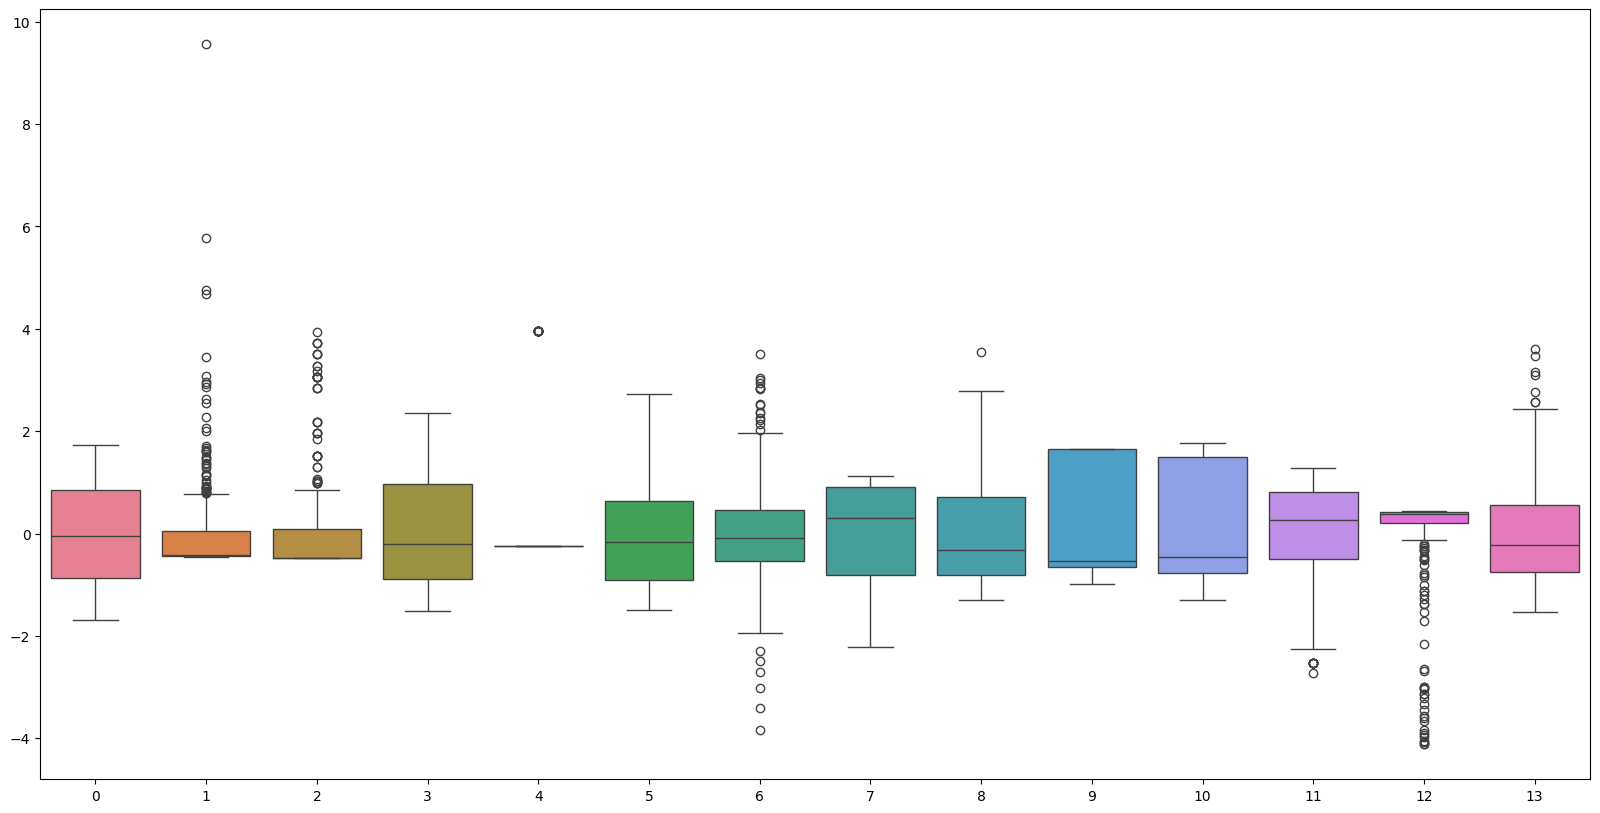

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=x_norm, ax=ax)
plt.savefig("boxplotTrainData.jpg")

In [83]:
# Checking standard deviation after normalization
pd.DataFrame(x_norm).std()

,0
0,1.001505
1,1.001505
2,1.001505
3,1.001505
4,1.001505
5,1.001505
6,1.001505
7,1.001505
8,1.001505
9,1.001505


In [ ]:
x_norm.std()

1.0

 **Model** **Training**

In [ ]:
regression= LinearRegression()
regression.fit(x_norm,y)

LinearRegression()

In [ ]:
print("Slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Slope: [-0.67143839 -0.37958707  1.11696641  0.37319711  0.89814782 -1.7688639
  2.72659854 -0.26715795 -3.17317116  3.15799219 -1.96115765 -1.82315983
  1.02753863 -4.24729794]
Intercept: 22.76876876876877


* Slope: The slope coefficients for each feature, indicating their relative importance in predicting the target variable.

* Intercept: The intercept value, representing the baseline prediction when all features are zero.

 **Model Prediction on Training data**



In [ ]:
training_data_prediction = regression.predict(x_norm)
print(training_data_prediction)

[30.47720693 25.12405867 29.35189585 28.43212691 22.99129066 17.99393411
 21.24162808 20.89023014 20.57083939 19.90987078 20.3596736  22.01679176
 16.98090524 12.22939746 18.03542225 15.83974467 13.57670016 14.51681159
 10.9391477  18.30298141 13.14483981 23.75594012 32.29325614 35.41779067
 25.97138043 25.28058766 23.07835796 22.31643685 20.34793636 16.99849796
 16.52844608 20.84609722 23.66949682 24.2385127  15.33079343 31.57430591
 24.76835734 33.19299182 22.44244787 17.72710171 18.00944143 22.88244414
 22.81414207 30.87510616 25.44020721 21.518716   17.26703455 26.13954408
 25.56096358 24.88548091 26.78226636 24.61469307 23.08727057 23.93699306
 29.03932178 27.08806549 25.3176405  24.80806788 28.01414619 21.97988454
 26.01454983 30.77376478 31.15053682 27.14881071 30.1567057  27.29088022
 24.3379091  25.27895584 26.50481276 19.48696265 20.58042405 17.03909988
 21.02686014 22.94236028 19.83484688 26.99584391 25.5864448  23.72416515
 24.0551334  20.28146092 21.04009881 22.42130449 22

**Observations**:

* The output will be a NumPy array containing the predicted values for each data point in the training set.

* The length of the train_pred array should be equal to the number of samples in the x_norm data.

* The values in train_pred represent the model's estimated target values for the corresponding training samples.

In [ ]:
# Calculate the error or the residual
residual = y-training_data_prediction
residual

,medv
0,-6.477207
1,-3.524059
2,4.048104
3,7.767873
4,-0.091291
...,...
328,0.486086
329,-0.046554
330,-0.655798
331,-2.797794


**Observations**:

* Sign: Positive residuals indicate that the model underpredicted the target value, while negative residuals indicate overprediction.
* Magnitude: The magnitude of the residuals reflects the degree of error. Larger residuals indicate greater deviations between the predicted and actual values.

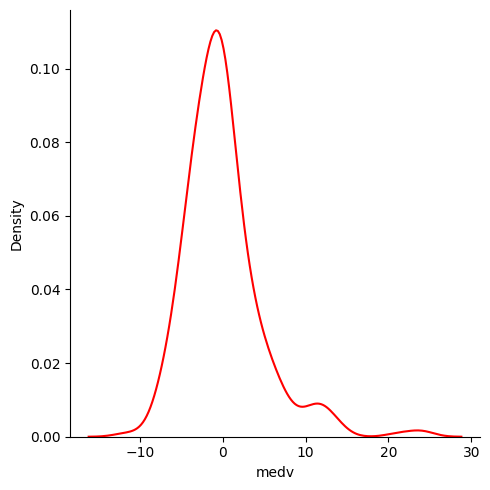

In [ ]:
# Distribution plot of the residual
sns.displot(residual, color='red', kind='kde')
plt.show()

**Observation:**

* **Normal Distribution**: If the KDE plot of the residuals resembles a normal (Gaussian) distribution, the model’s errors are evenly distributed, which is a good sign of a well-fitted model.
* **Skewness**: If the plot is skewed to the left or right, it means that the model tends to overpredict or underpredict in certain price ranges, indicating possible issues with model accuracy or bias.
* **Peaks and Tails**: A sharp peak or heavy tails (where the distribution spreads out too far from the center) could indicate that the model is not capturing certain patterns in the data, leading to higher prediction errors for some houses.

In [ ]:
# R-squared error
rse = r2_score(y, training_data_prediction)
print("R-squared error:", rse)

# Mean squared error
mse1 = mean_squared_error(y, training_data_prediction)
print("Mean squared error:", mse1)

rmse= np.sqrt(mse1)
print("Root Mean Squared Error:", rmse)



R-squared error: 0.7355786478533118
Mean squared error: 22.18489998632602
Root Mean Squared Error: 4.710084923472826


**Observations**:

R-squared:

* R-squared measures the proportion of variance in the target variable that is explained by the model.
* A higher R-squared value indicates a better fit, with 1 being the perfect fit.
  However, R-squared can be misleading in some cases, especially with small datasets or complex relationships.

MSE:

* MSE measures the average squared difference between the predicted and actual values.
* A lower MSE indicates better performance, as it means the model is making predictions closer to the true values.

RMSE:

* RMSE is the square root of MSE, which makes it more interpretable as it is in the same units as the target variable.
* A lower RMSE indicates better performance.

**Visualizing the actual prices and the predicted prices**

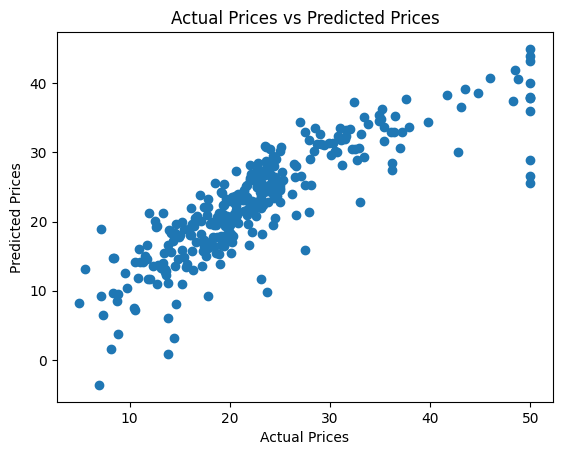

In [ ]:
plt.scatter(y, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Observation:**

* **Linear Relationship:** The points show a roughly linear relationship (cluster around the 45-degree line), this indicates that the model has captured the relationship between the features and the target variable (house prices) relatively well.
* **Outliers:** Individual points that are far from the main cluster could represent outliers—houses where the model’s predictions are significantly off.

**Model Prediction on Testing data**

In [ ]:
# Normalizing the test data
Test_data = pd.read_csv('test.csv')
x1 = sc.transform(Test_data)


In [ ]:
x1

array([[-1.67946731, -0.45401849, -0.47212294, ..., -0.30161579,
         0.38591303, -1.20238662],
       [-1.65914724, -0.45366977, -0.47212294, ...,  0.11726397,
         0.40083418, -1.03518056],
       [-1.64560052, -0.43804568,  0.07998037, ..., -1.51171288,
         0.43298984,  0.94011813],
       ...,
       [ 1.68011821, -0.42516363, -0.47212294, ...,  0.34997495,
         0.43298984,  0.05732682],
       [ 1.69366492, -0.42717147, -0.47212294, ...,  0.34997495,
         0.43298984,  0.25712389],
       [ 1.72075835, -0.44280782, -0.47212294, ...,  1.18773447,
         0.39308444, -0.8552215 ]])

**Observations**:

The x1 variable now contains the normalized test data. Each feature in x1 will have a mean of 0 and a standard deviation of 1, just like the training data.

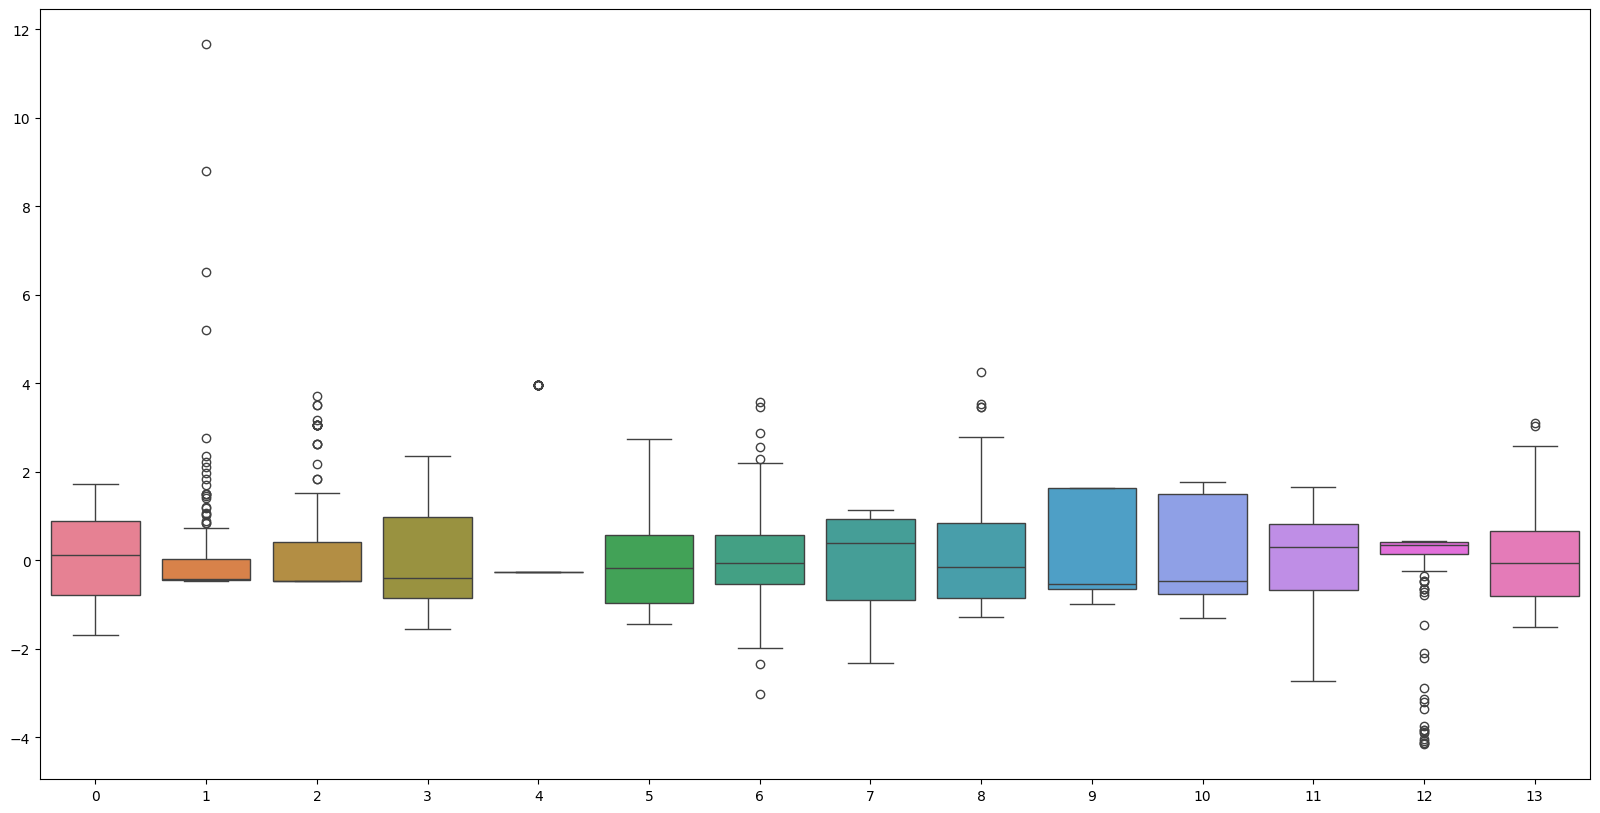

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=x1, ax=ax)
plt.savefig("boxplotTestData.jpg")

In [ ]:
x1.std()

1.0782777878803846

In [75]:
test_data_prediction = regression.predict(x1)

print(test_data_prediction)

[31.27947429 25.64467092 18.66939919  9.70469293 18.18776827 17.25721236
 19.17726072 15.73496669 13.24982207 15.5718257  19.86982974 21.36318328
  7.7493535  14.12561852 24.37918489 22.78142834 23.92830169 28.95121883
  6.98337459 28.13150174 21.49340364 24.3633102  21.0157493  22.27629255
 21.48174445 23.1349735  26.53357032 27.40764862 29.63245149 28.66678691
 36.01716279 35.76571544 32.41445524 21.78926285 18.52394786 21.24472516
 20.6427661  20.48508635 20.22964004 22.77639638 14.56069361 20.93906783
 21.03828501 17.81868028 13.61749515 12.01152334  8.28275913 15.72540189
 18.82390015 21.90036804 21.23938497 33.93579311 42.64212385 26.35818872
 21.59393999 23.90512336 32.5148109  40.69463756 35.37480505 33.69092227
 30.03049353 36.9894938  16.80662396 16.43691169 22.36650512 23.20489902
 24.48558839 28.03618599 24.99532562 30.30865301 33.95889669 36.21532845
 33.26842371 32.7474714  28.15040973 27.84890977 22.50614817 11.72942872
 18.7289378  24.97332512 22.81780728 20.4509287  37

**Observations:**

* The output will be a NumPy array containing the predicted values for each data point in the test set.

* The length of the test_prediction array should be equal to the number of samples in the x1 data.

* The values in test_prediction represent the model's estimated target values for the corresponding test samples.